In [2]:
library(scatterplot3d)
library(heplots)
library(cluster)
library(MVN)
library(plotly)
library(klaR)
library(Morpho)
library(caret)
library(mclust)
library(ggplot2)
library(GGally)
library(plyr)
library(psych)
library(factoextra)
library(repr)

options(repr.plot.width = 16, repr.plot.height = 12)

In [3]:
Sys.setlocale(category = "LC_ALL", locale = "Russian")

[1] "LC_COLLATE=Russian_Russia.1251;LC_CTYPE=Russian_Russia.1251;LC_MONETARY=Russian_Russia.1251;LC_NUMERIC=C;LC_TIME=Russian_Russia.1251"

In [4]:
dataframe <- read.table('data.csv', header = TRUE,  sep = ',')
dataframe <- na.omit(dataframe)
head(dataframe)

,A,B,C,D,E,F,G,H,I,J,K,Name
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,57.60238,21.71322,51.65182,63.15491,47.50259,59.35368,8.753383,20.603756,6.491436,65.02040,8.078522,Dum
2,68.83134,24.31474,57.22687,62.42691,43.18839,51.63182,14.513575,73.935348,20.224595,74.94872,8.554909,Dum
3,26.39129,33.54387,97.81550,62.18773,12.46912,61.80452,33.145005,9.061499,26.646903,46.18950,11.804890,Albukerke
4,67.07043,78.42686,49.09763,48.87779,22.98881,47.41171,85.111717,41.587100,18.941216,64.50461,13.156304,Eugene
5,72.76105,48.36484,68.36730,44.16909,19.68516,68.10718,83.206047,52.037685,5.547961,74.68590,12.098432,Eugene
6,59.54595,78.88656,65.15747,21.71169,22.03904,64.93015,54.315721,71.587874,7.979146,73.80838,12.670125,Eugene


In [5]:
dataframe <- subset(dataframe, Name %in% c('Albukerke', 'Dum', 'Choluteco'), select = c(C, I, A, Name))
dataframe$Name <- as.factor(dataframe$Name)
head(dataframe)

,C,I,A,Name
,<dbl>,<dbl>,<dbl>,<fct>
1,51.65182,6.491436,57.60238,Dum
2,57.22687,20.224595,68.83134,Dum
3,97.81550,26.646903,26.39129,Albukerke
11,49.26778,12.292205,81.15551,Choluteco
12,71.33882,4.261734,56.17829,Dum
19,25.50089,4.744516,75.64467,Choluteco


In [6]:
summary(dataframe)

       C                I                  A                Name    
 Min.   : 25.08   Min.   : 0.01199   Min.   :25.00   Albukerke:749  
 1st Qu.: 43.85   1st Qu.: 8.90383   1st Qu.:44.05   Choluteco:749  
 Median : 60.48   Median :15.25803   Median :65.05   Dum      :749  
 Mean   : 65.05   Mean   :15.58264   Mean   :60.86                  
 3rd Qu.: 96.26   3rd Qu.:22.04060   3rd Qu.:77.44                  
 Max.   :100.00   Max.   :33.96930   Max.   :84.99                  

Рисуем дендрограмму...

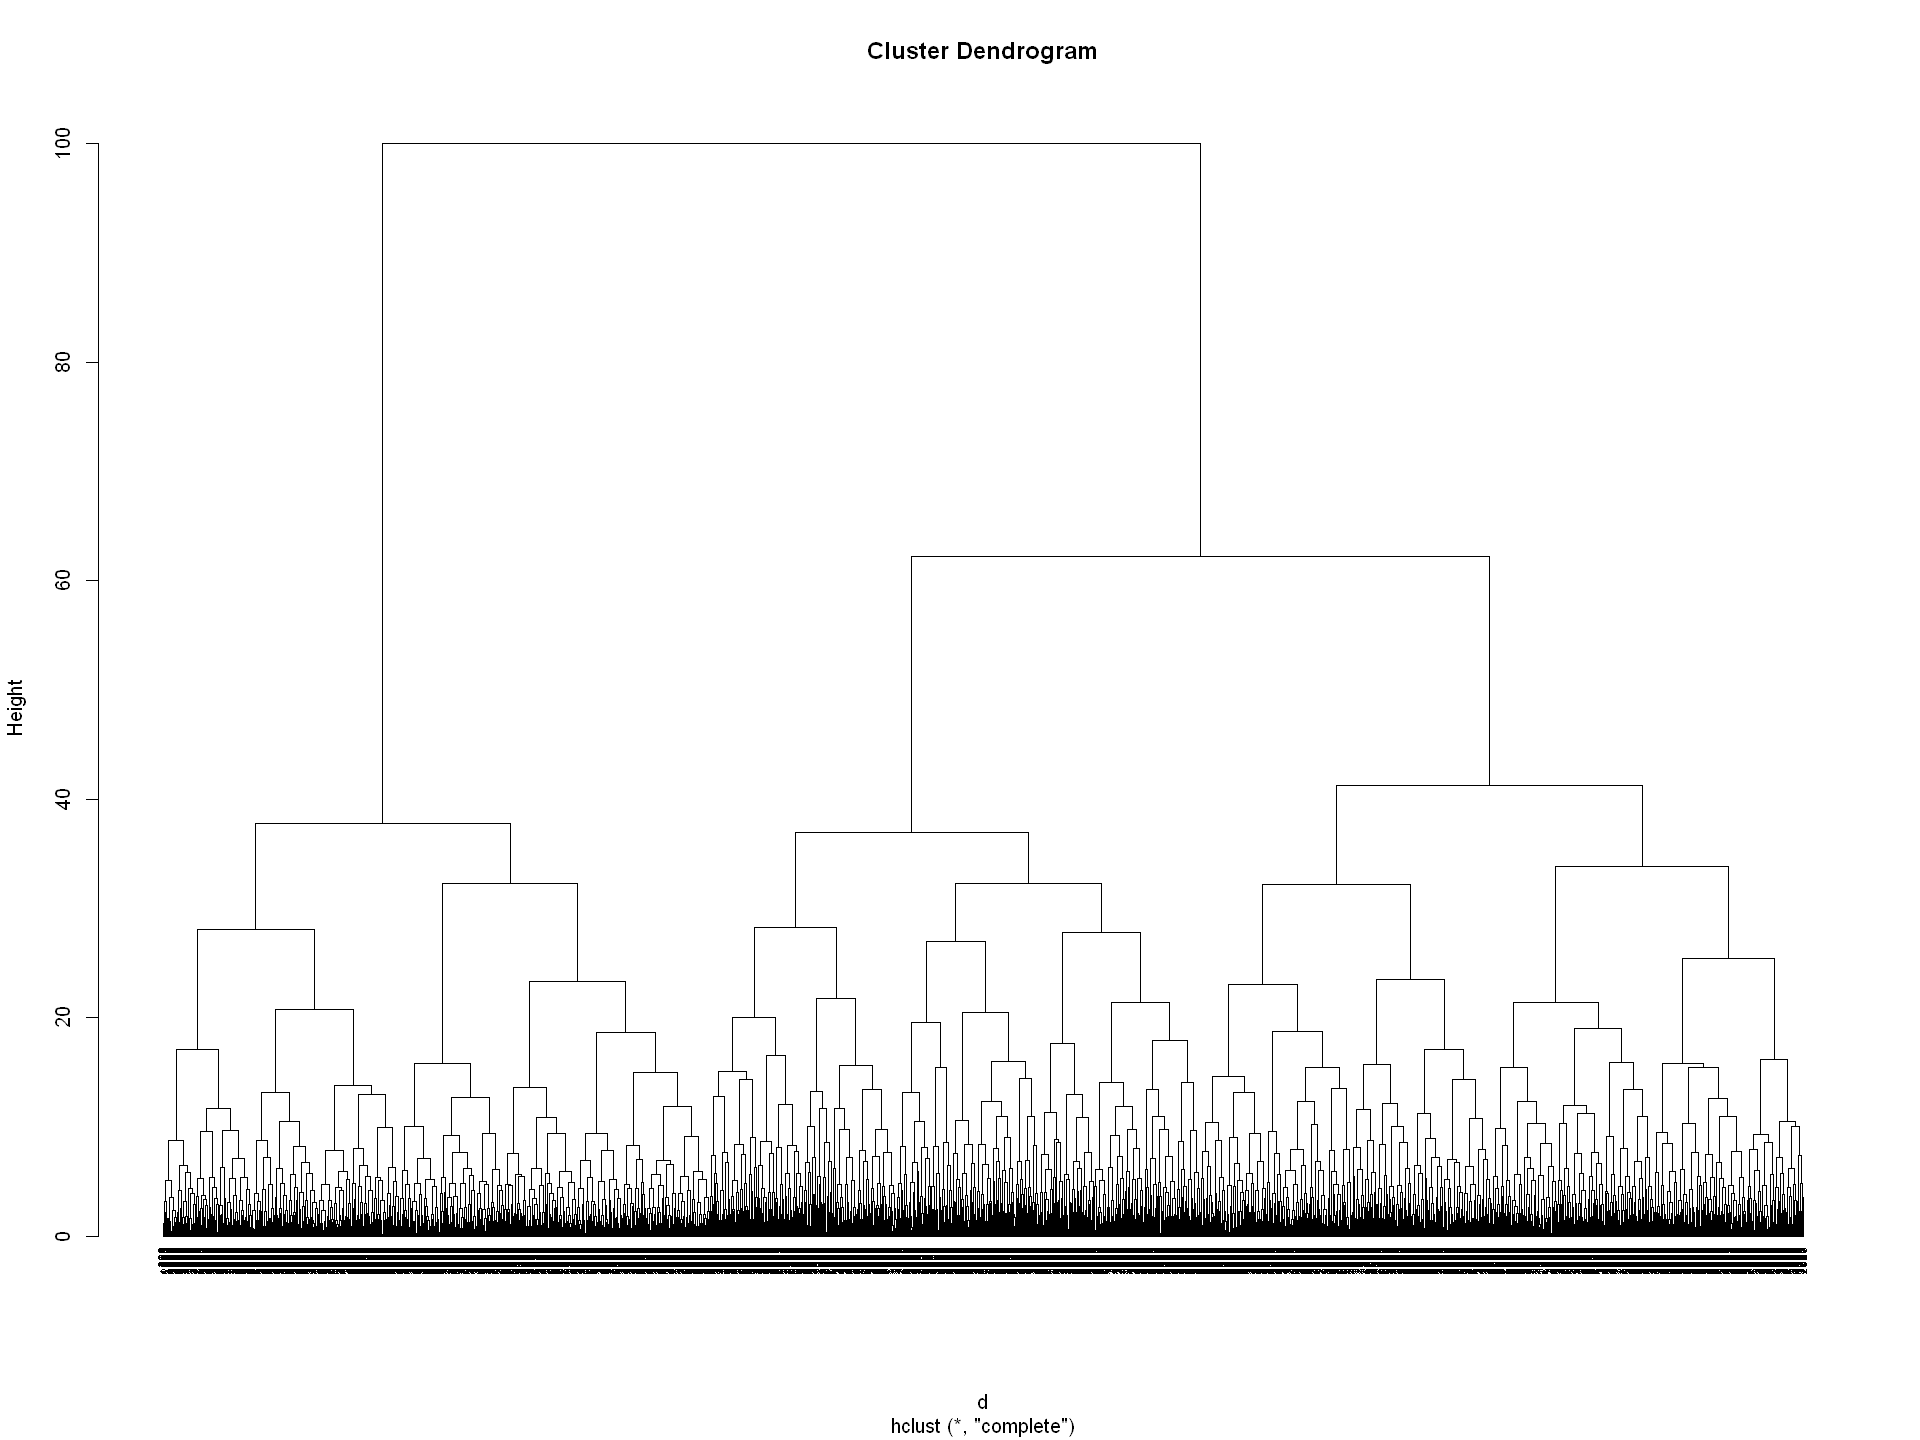

In [7]:
cat("Рисуем дендрограмму...")

# Dissimilarity matrix
d <- dist(dataframe[,1:3], method = "euclidean",  diag=TRUE)

# Hierarchical clustering
hc <- hclust(d)

# Plot the obtained dendrogram
plot(hc, cex = 0.6, hang = -1)

Выделяем два кластера на дендрограмме...

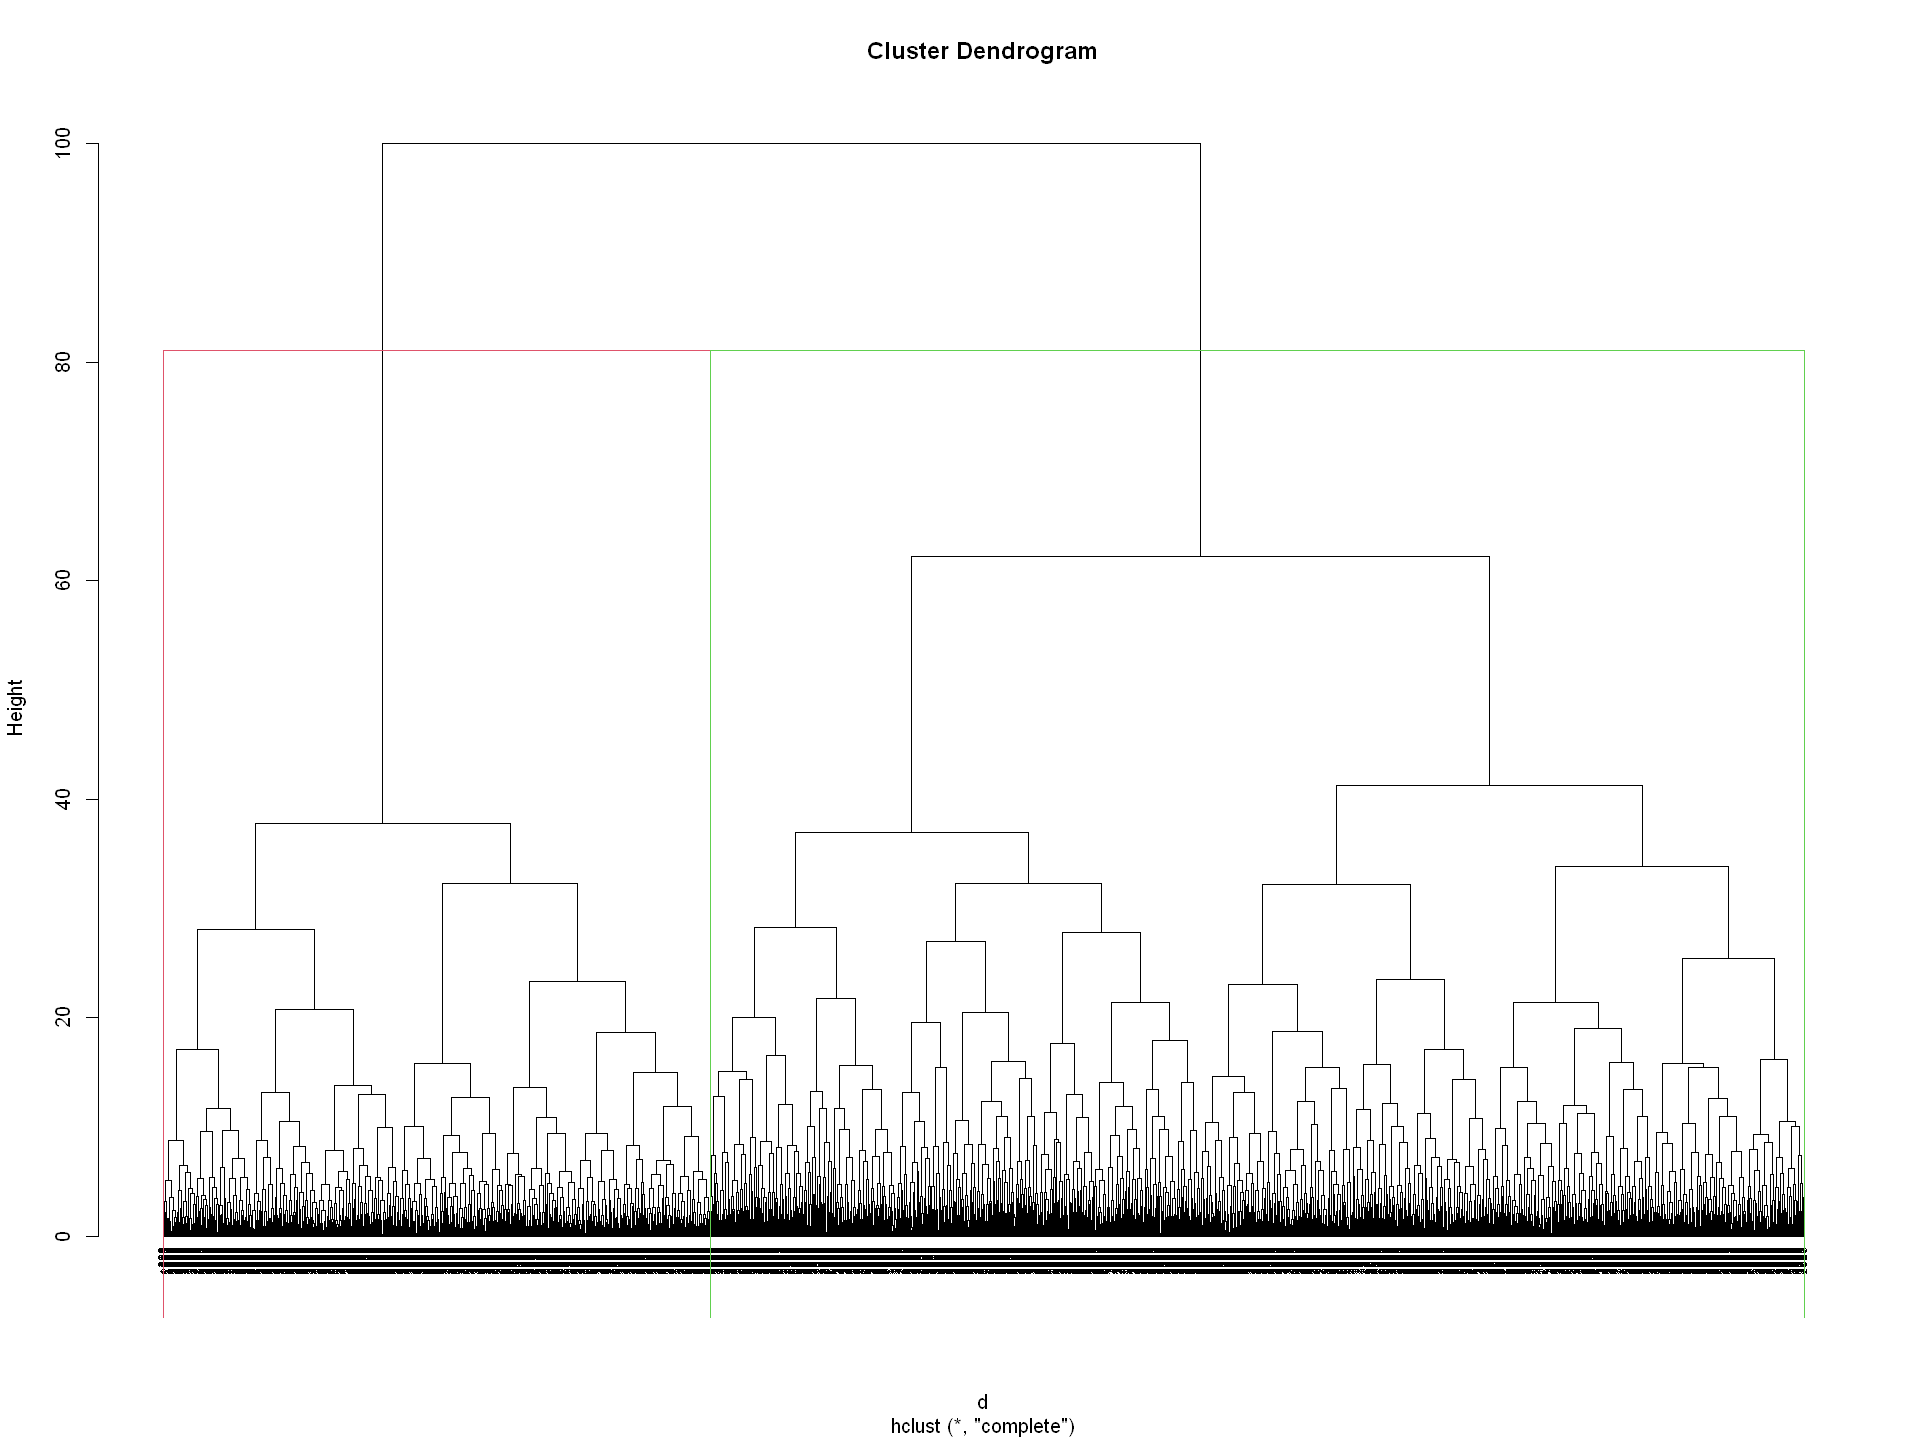

In [16]:
cat("Выделяем два кластера на дендрограмме...")

plot(hc, cex = 0.6, hang = -1)
rect.hclust(hc, k = 2, border = 2:5)

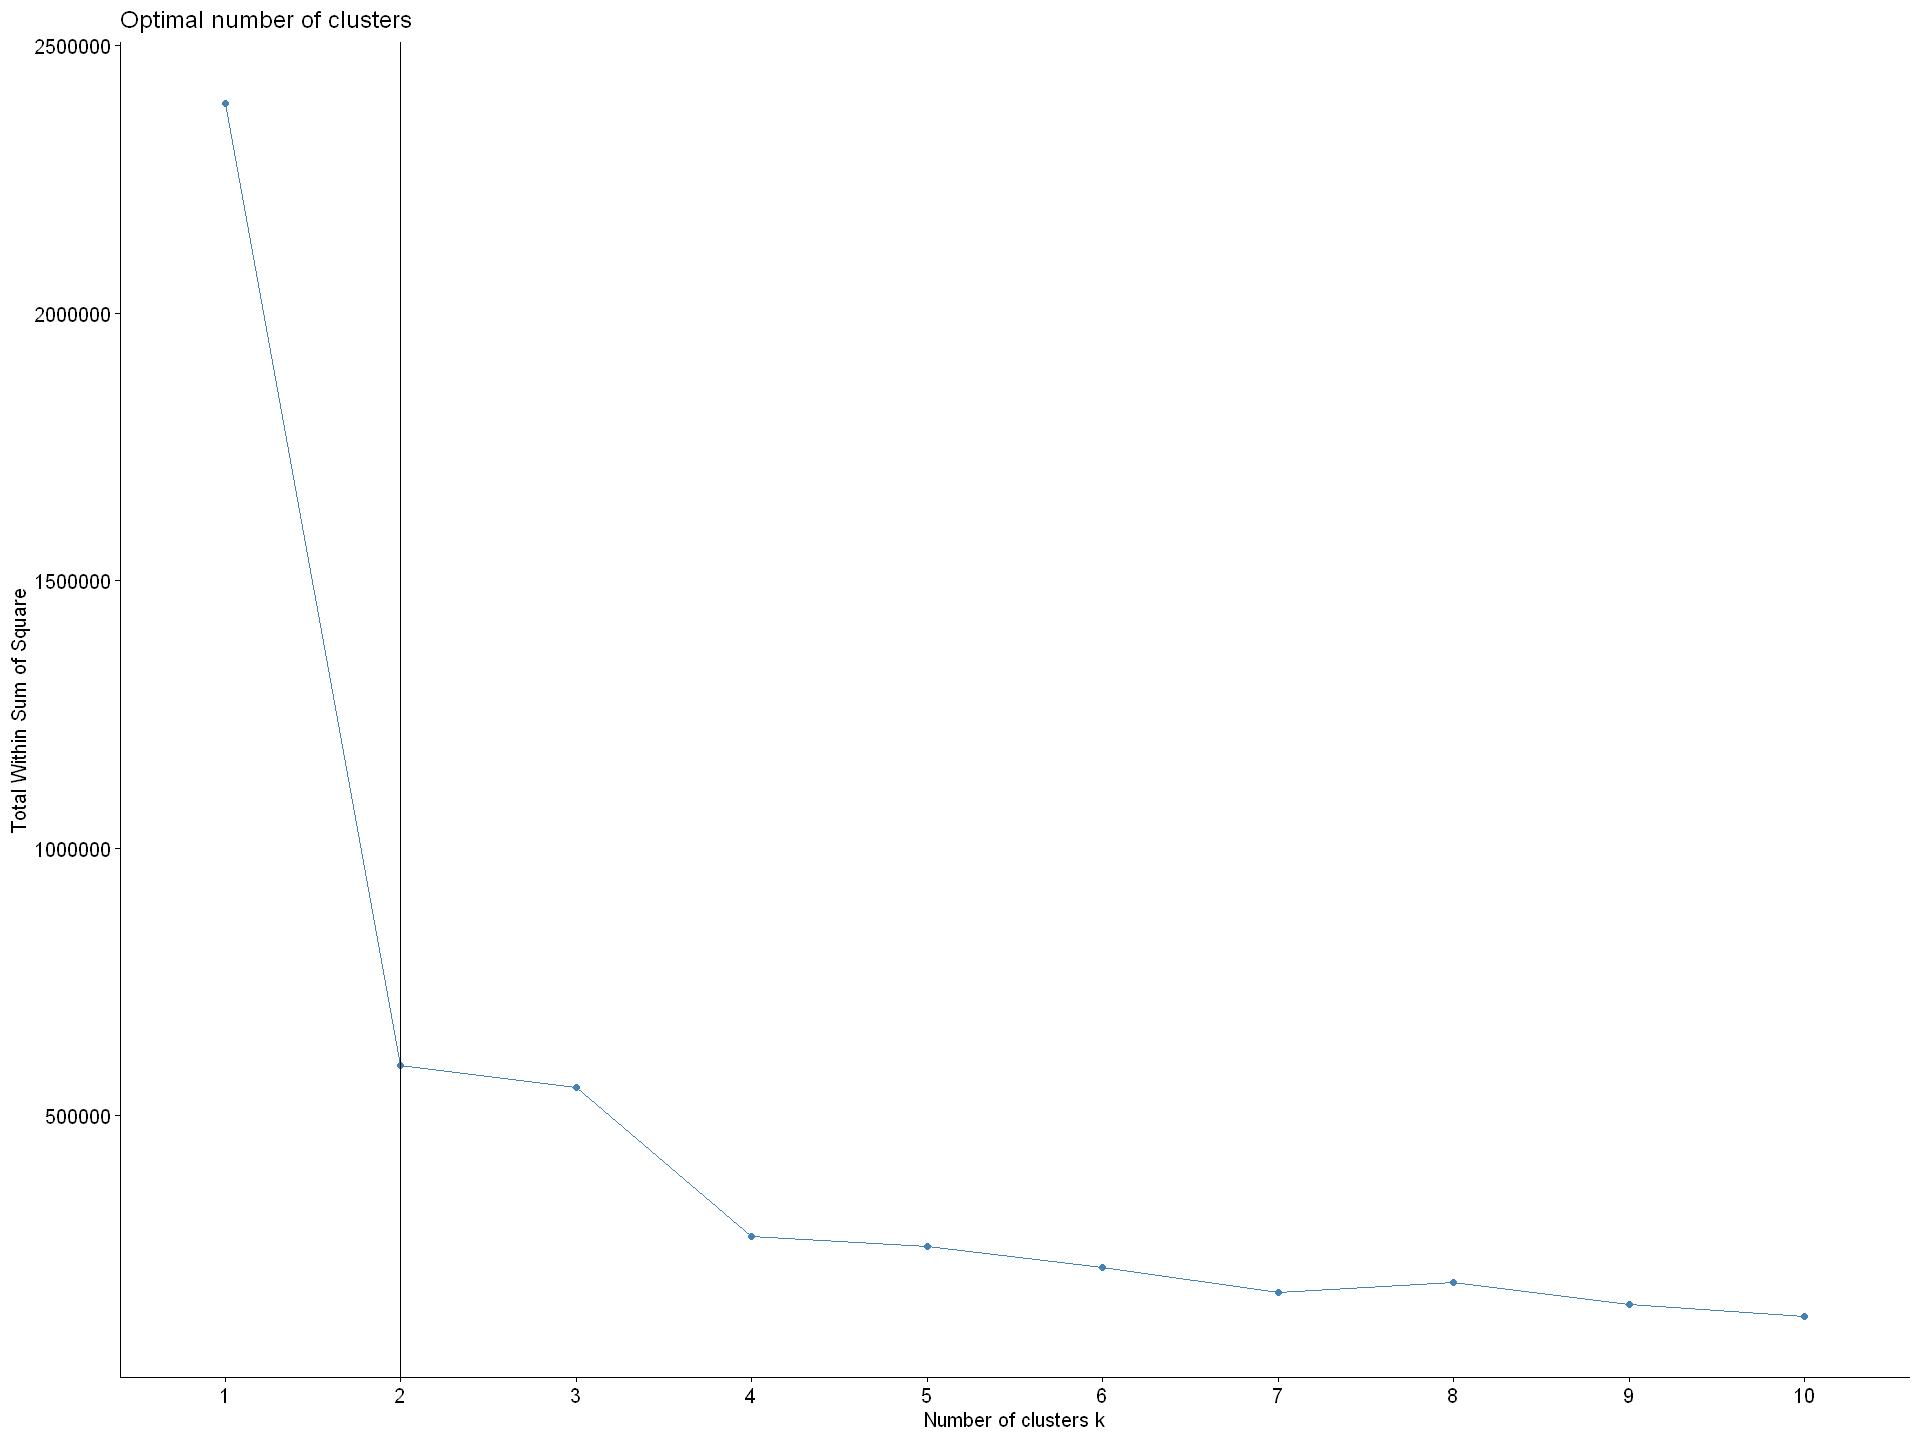

In [9]:
fviz_nbclust(dataframe[,1:3], kmeans, method = 'wss') + geom_vline(xintercept = 2, linetype = 1)

In [10]:
cat("Оптимальное число кластеров соответствует точке перегиба графика. В данном случае лучше разделить записи на 2 кластера.
Теперь выполним непосредственно кластерный анализ методом k-средних для 2 кластеров с помощью функции kmeans:")

km <- kmeans(dataframe[,1:3], 2, nstart = 1000)
table(km$cluster, dataframe$Name)

Оптимальное число кластеров соответствует точке перегиба графика. В данном случае лучше разделить записи на 2 кластера.
Теперь выполним непосредственно кластерный анализ методом k-средних для 2 кластеров с помощью функции kmeans:

   
    Albukerke Choluteco Dum
  1       749         0   1
  2         0       749 748

In [11]:
cat("Чтобы убедиться в результатах анализа определим средние значениях всех анализируемых параметров в каждом из кластеров:")
cat("\n\nВ таблице можно увидеть различия между записями в разных кластерах:")

centroids <- aggregate(dataframe[,1:3], by = list(km$cluster),FUN = mean)
centroids


Чтобы убедиться в результатах анализа определим средние значениях всех анализируемых параметров в каждом из кластеров:

В таблице можно увидеть различия между записями в разных кластерах:

Group.1,C,I,A
<int>,<dbl>,<dbl>,<dbl>
1,97.50192,14.93670,37.56472
2,48.78852,15.90626,72.52776


In [12]:
cat("Теперь присвоим номера кластеров каждой из записей исходного набора данных:")

dataframe <- data.frame(dataframe, km$cluster)
head(dataframe)

Теперь присвоим номера кластеров каждой из записей исходного набора данных:

,C,I,A,Name,km.cluster
,<dbl>,<dbl>,<dbl>,<fct>,<int>
1,51.65182,6.491436,57.60238,Dum,2
2,57.22687,20.224595,68.83134,Dum,2
3,97.81550,26.646903,26.39129,Albukerke,1
11,49.26778,12.292205,81.15551,Choluteco,2
12,71.33882,4.261734,56.17829,Dum,2
19,25.50089,4.744516,75.64467,Choluteco,2


Трехмерный график на основе кластерной группы


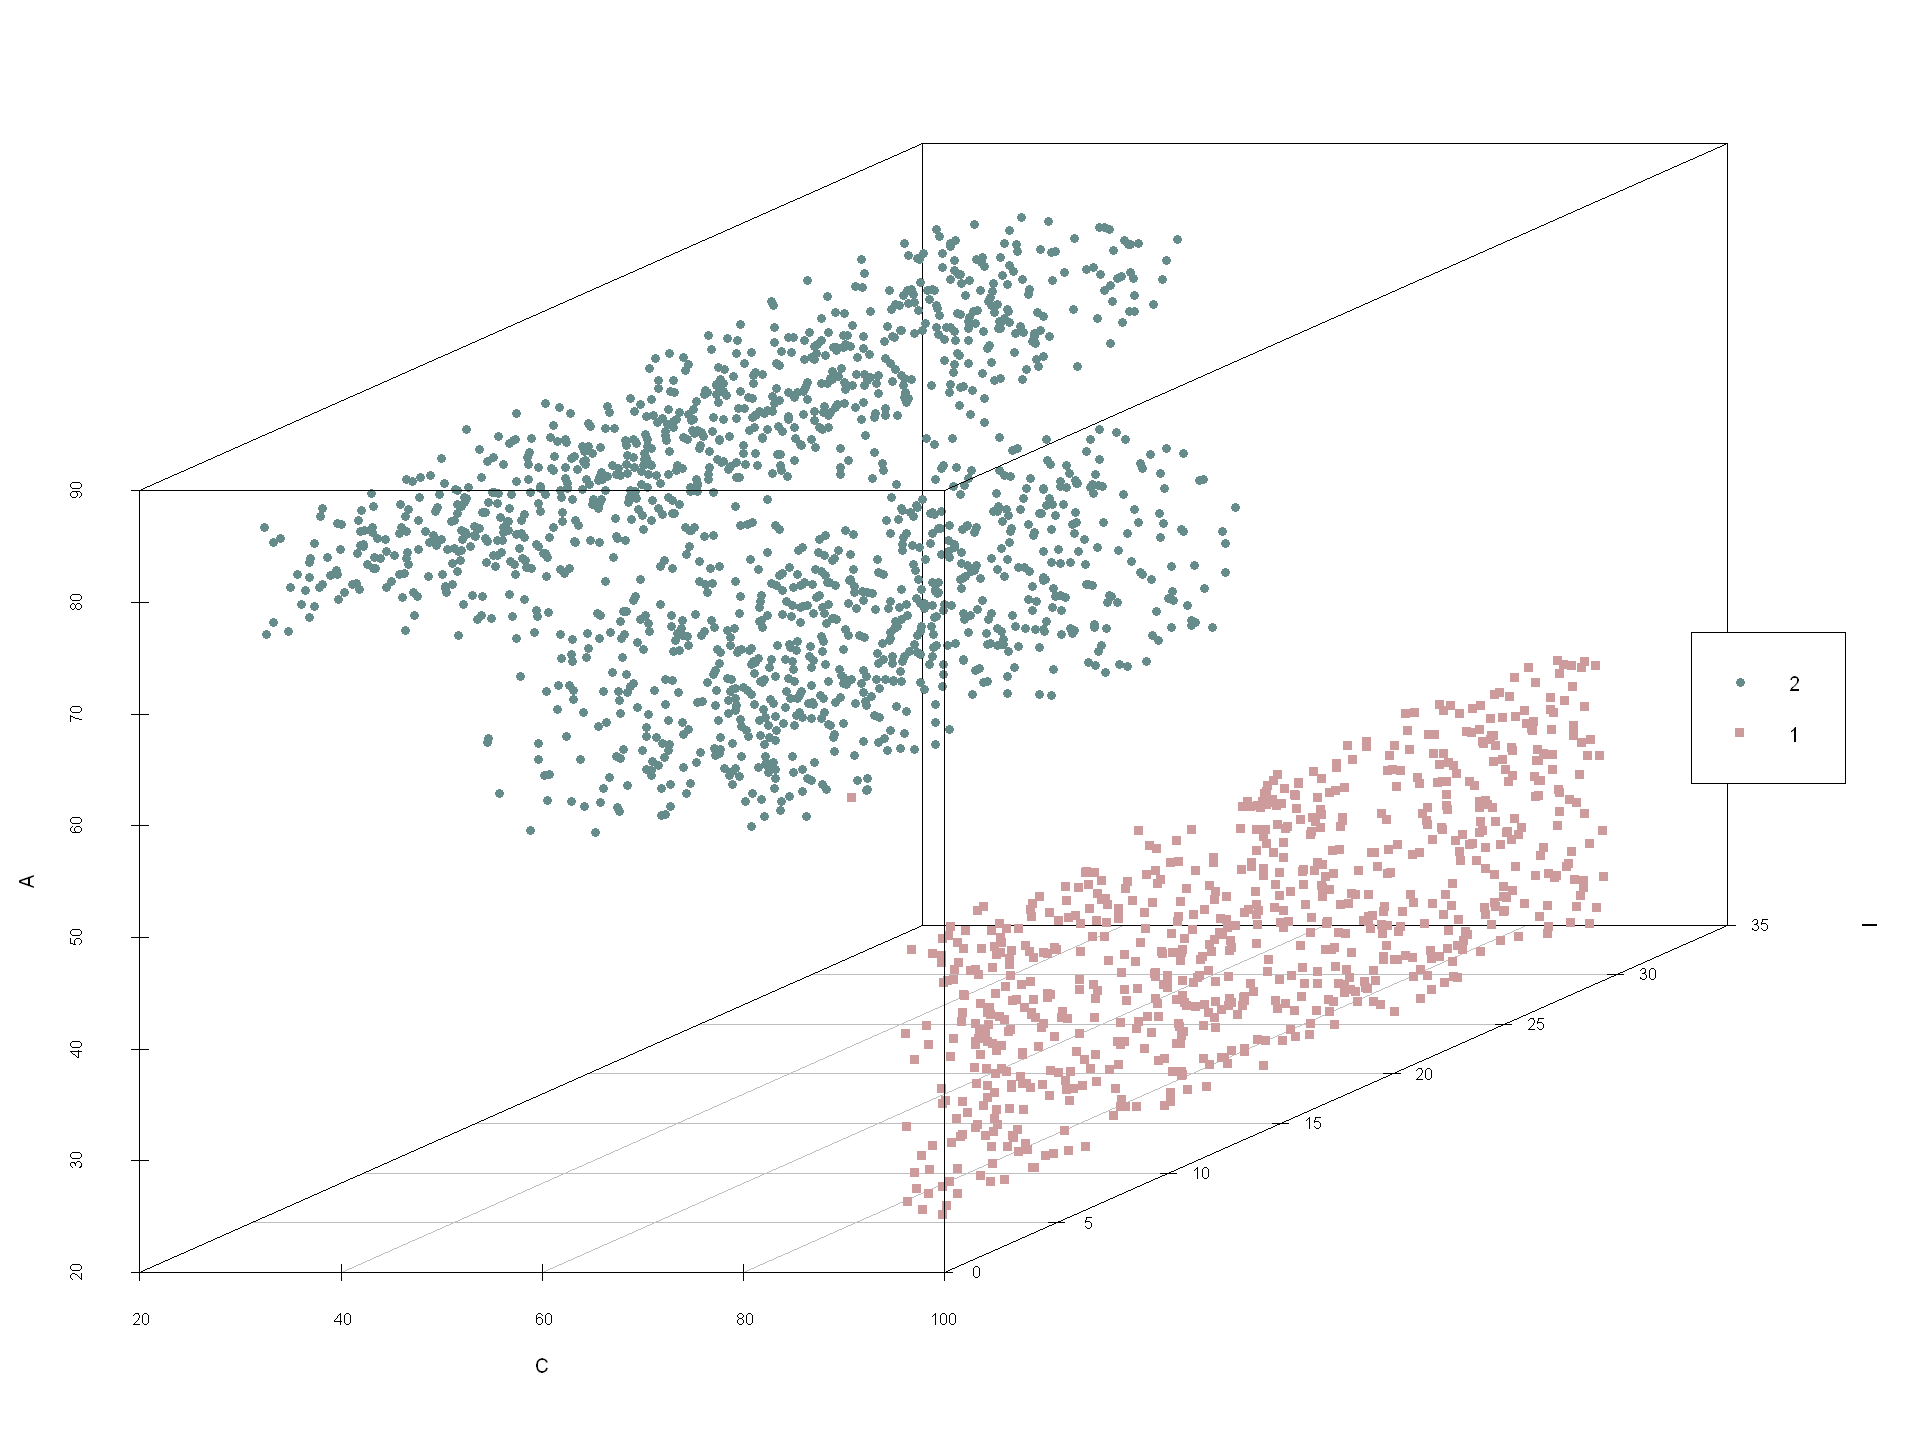

In [13]:
cat("Трехмерный график на основе кластерной группы\n")
colors <- c('rosybrown3', 'paleturquoise4')
point_shapes <- c(15, 16)
s3d <- scatterplot3d(dataframe[,1:3], pch = point_shapes[dataframe$km.cluster], color = colors[dataframe$km.cluster])
s3d$points3d(centroids$D[1], centroids$E[1], centroids$J[1], pch = point_shapes[1], cex = 3)
s3d$points3d(centroids$D[2], centroids$E[2], centroids$J[2], pch = point_shapes[2], cex = 3)
legend('right', legend = unique(dataframe$km.cluster), 
       col = colors[unique(dataframe$km.cluster)], pch = point_shapes[unique(dataframe$km.cluster)])

Мы будем использовать коэффициент силуэта (ширину силуэта), чтобы оценить качество нашей кластеризации.

Коэффициент силуэта рассчитывается следующим образом:

    Для каждого наблюдения i вычисляется среднее различие между i и всеми другими точками в пределах одного и того же кластера. 
Назовем это среднее несходство Di.
    Теперь мы делаем тот же расчет несходства между i и всеми другими кластерами и получаем среди них наименьшее значение. 
Т.е. мы обнаруживаем несходство между кластером и кластером, ближайшим к нему прямо после его собственного кластера. 
Назовем это значение Ci.
    Ширина силуэта (Si) - это разница между Ci и Di делённая на наибольшее из этих двух значений (max (Di, Ci)).
Si = (Ci - Di) / max(Di, Ci).

Итак, трактовка ширины силуэта следующая:

* Si > 0 означает, что наблюдение хорошо сгруппировано. Чем ближе он к 1, тем лучше кластеризован.
* Si < 0 означает, что наблюдение было помещено в неправильный кластер.
* Si = 0 означает, что наблюдение происходит между 

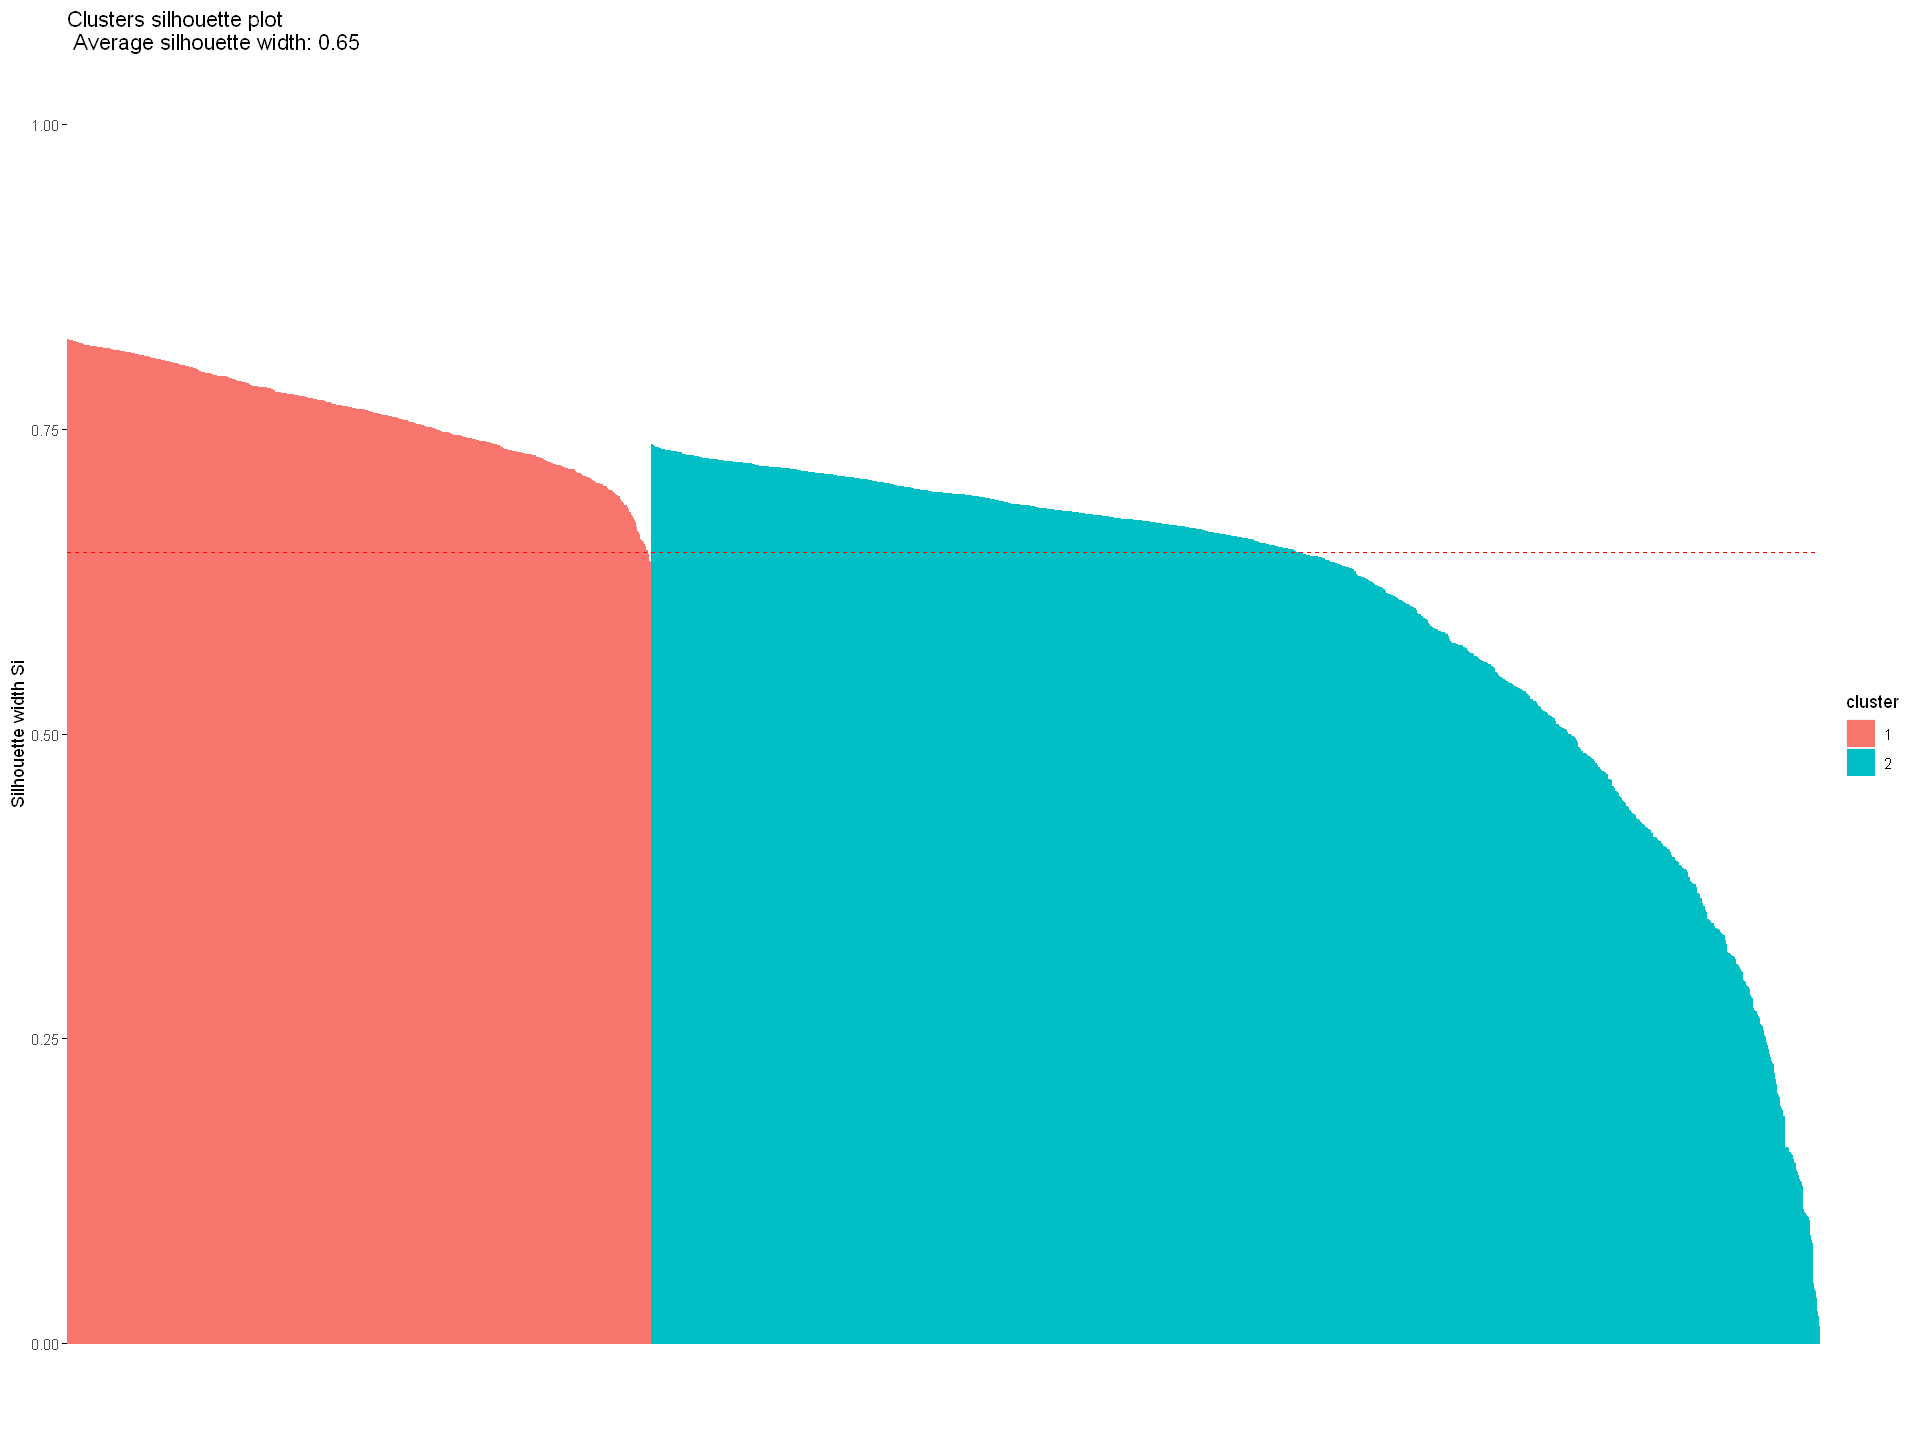

In [14]:
cat("Мы будем использовать коэффициент силуэта (ширину силуэта), чтобы оценить качество нашей кластеризации.

Коэффициент силуэта рассчитывается следующим образом:

    Для каждого наблюдения i вычисляется среднее различие между i и всеми другими точками в пределах одного и того же кластера. 
Назовем это среднее несходство Di.
    Теперь мы делаем тот же расчет несходства между i и всеми другими кластерами и получаем среди них наименьшее значение. 
Т.е. мы обнаруживаем несходство между кластером и кластером, ближайшим к нему прямо после его собственного кластера. 
Назовем это значение Ci.
    Ширина силуэта (Si) - это разница между Ci и Di делённая на наибольшее из этих двух значений (max (Di, Ci)).
Si = (Ci - Di) / max(Di, Ci).

Итак, трактовка ширины силуэта следующая:

* Si > 0 означает, что наблюдение хорошо сгруппировано. Чем ближе он к 1, тем лучше кластеризован.
* Si < 0 означает, что наблюдение было помещено в неправильный кластер.
* Si = 0 означает, что наблюдение происходит между двумя кластерами.

______________________________
\n")

silhouette_width <- silhouette(dataframe$km.cluster, dist(dataframe[,1:3]))
fviz_silhouette(silhouette_width)

cat("\nГрафик силуэта ниже свидетельствует о том, что наша кластеризация с использованием двух групп хороша, поскольку 
отсутствует отрицательная ширина силуэта и большинство значений ближе к 1.")